In [1]:
import sys
import random
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def load_csv(filepath):
    data = []
    with open(filepath) as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        for row in reader:
            data.append(dict(row))
    return data

In [3]:
data = load_csv("data/businesses.csv")
data[:3]

[{'bid': '0',
  'food_class': 'Asian',
  'food_type': 'Japanese',
  'location_x': '2.5312408840758795',
  'location_y': '11.317369500500567',
  'num_reviews': '350'},
 {'bid': '1',
  'food_class': 'Asian',
  'food_type': 'Korean',
  'location_x': '2.846354526744878',
  'location_y': '9.923033284329772',
  'num_reviews': '297'},
 {'bid': '2',
  'food_class': 'Asian',
  'food_type': 'Japanese',
  'location_x': '2.8843027707265443',
  'location_y': '10.66899232977484',
  'num_reviews': '277'}]

In [4]:
column_data_types = {
    "bid":"integer",
    "location_x":"float",
    "location_y":"float",
    "num_reviews":"integer"
}

In [5]:
class Data:
    def __init__(self, data, column_data_types):
        self.data = data
        self.column_data_types = column_data_types

    def convert_data_types(self,data, columns_defs):
        result = []
        for row in data:
            new_values = {}
            for name, value in row.items():
                if name in columns_defs and columns_defs[name] == "float":
                    new_values[name] = float(value)
                elif name in columns_defs and columns_defs[name] == "integer":
                    new_values[name] = int(value)
                else:
                    new_values[name] = value

            result.append(new_values)
        return result

    def select_columns(self, data, column_defs):
        result = []
        for row in data:
            filtered_values = {}
            for name, value in row.items():
                if name in column_data_types:
                    filtered_values[name] = value

            result.append(filtered_values)

        return result
    
    def kmeans_data(self):
        column_defs = {"location_x": "float","location_y": "float"}
        selected_data = self.select_columns(self.data, column_defs)
        return self.convert_data_types(selected_data, column_defs)
    
    def kmeans_data_for_viz(self):
        data = self.kmeans_data()
        x_vals = [r["location_x"] for r in data]
        y_vals = [r["location_y"] for r in data]
        
        return x_vals, y_vals

In [6]:
def scatter_plot(x_vals, y_vals, colors=None):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_vals, y_vals, c=colors)
    ax.grid(True)
    return fig    

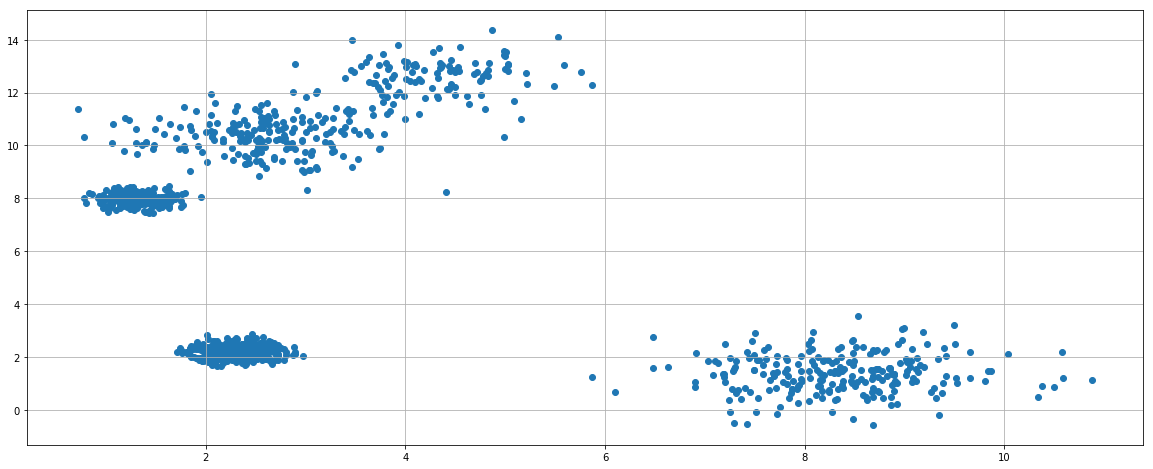

In [8]:
kmeans_data = Data(data, column_data_types)
x_vals, y_vals = kmeans_data.kmeans_data_for_viz()
fig = scatter_plot(x_vals, y_vals)
plt.show()

class KMeans:

In [121]:
class KMeans:
    def __init__(self, k, num_iterations=200, tolerance=0.00001):
        self.k = k
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        # data : [(x1, y1), (x2, y2)]
        # centers [(cemter1_x, center1_y), ...]
        # labels [label_1, label_2ke, ...]
        # where label_i = {0..(k-1)}
        
    def fit(self, data):
        centers = self._initialize_centers(data)
        for i in range(self.num_iterations):
            # assign labels
            labels = self._assign_labels(data, centers)
            
            # calculate now cluster centers
            new_centers = self._calculate_cluster_centers(data, labels)
            
            # check if we need to break the loop
            center_diffs = []
            for cluster_id in range(self.k):
                distance_diff = self._distance_between(new_centers[cluster_id], centers[cluster_id])
                center_diffs.append(distance_diff <= self.tolerance)
            if all(center_diffs):
                break
            centers = new_centers
        
        return centers, labels
                
    def _initialize_centers(self, data):
        random_point_idx = random.sample(range(len(data)), self.k)
        centers = [data[idx] for idx in random_point_idx]
        return centers
        # return [(center1_x, center2_y), (...)]
        
    def _assign_labels(self, data, centers):
        labels=[]
        for data_poiint in data:
            distances_to_clusters=[]
            for center_point in centers:
                distance = self._distance_between(data_poiint, center_point)
                distances_to_clusters.append(distance)
            nearest_distance, label = min([(val,idx) for idx, val in enumerate(distances_to_clusters)])
            labels.append(label)
        # somewhere, self._distance_between()
        # return [label_1,, label_2, ...]
        pass
    def _distance_between(self, point1, point2):
        squared_diff_sum = (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2
        return squared_diff_sum ** 0.5
        
        # point: (point_x, point_y)
        # return distance(float)
    def _mean(self, points):
        num_dimensions = 2
        sums = [0] * num_dimensions
        for point in points:
            for dim in range(num_dimensions):
                sums[dim] += point[dim]
                
        return tuple([s/len(points) for s in sums])
        # points: [(x1, y1), (x2, y2), ...]
        # return means(mean_x, mean_y)
    def _calculate_cluster_centers(self, data, labels):
        cluster_points = {}
        
        for idx, label in enumerate(labels):
            if label not in cluster_points:
                cluster_points[label] = []
            cluster_points[label].append(data[idx])
        
        centers = []
        for cluster_id, points in cluster_points.itemsss():
            center = self._mean(points)
            centers.append(center)
        return centers
        # return centers[(center1_x, center1_y)]

In [125]:
data_for_kmeans = list(zip(x_vals, y_vals))
kmeans = KMeans(2)
kmeans.fit(data_for_kmeans)

TypeError: 'NoneType' object is not iterable

In [ ]:
colors = {0:'tab:blue', 1:'tab:orange'}
label_colors = [colors[label] for label in labels]
fig = scatter_plot(x_vals, y_vals, label_colors)
plt.show()